In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf

tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
# ## Loading the MNIST Dataset

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


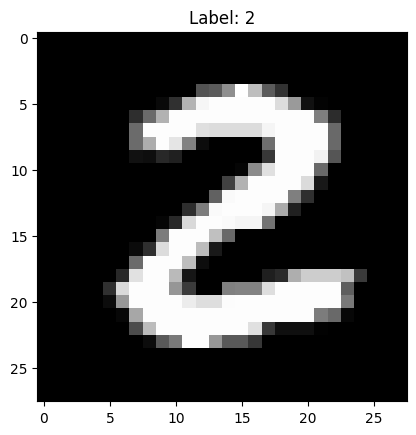

In [5]:
plt.imshow(X_train[25], cmap="gray")
plt.title(f"Label: {Y_train[25]}")
plt.savefig("sample_image.png")  # Save for PPT
plt.show()

In [6]:
# %%
print("Unique values in Y_train:", np.unique(Y_train))
print("Unique values in Y_test:", np.unique(Y_test))


Unique values in Y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in Y_test: [0 1 2 3 4 5 6 7 8 9]


In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(
            10, activation="softmax"
        ),  # Softmax for multi-class classification
    ]
)

In [9]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [10]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2875 - accuracy: 0.9162 - val_loss: 0.1474 - val_accuracy: 0.9547
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1314 - accuracy: 0.9607 - val_loss: 0.1116 - val_accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0975 - accuracy: 0.9696 - val_loss: 0.1075 - val_accuracy: 0.9664
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0789 - accuracy: 0.9752 - val_loss: 0.1082 - val_accuracy: 0.9654
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9790 - val_loss: 0.0909 - val_accuracy: 0.9706
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0556 - accuracy: 0.9823 - val_loss: 0.0981 - val_accuracy: 0.9699
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0498 - accuracy: 0.9834 - val_loss: 0.0965 - val_accuracy:

In [11]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Save the model
model.save("mnist_model_updated.keras")
print("Model saved as 'mnist_model.keras'")


313/313 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9738
Test Accuracy: 0.9738
Model saved as 'mnist_model.keras'


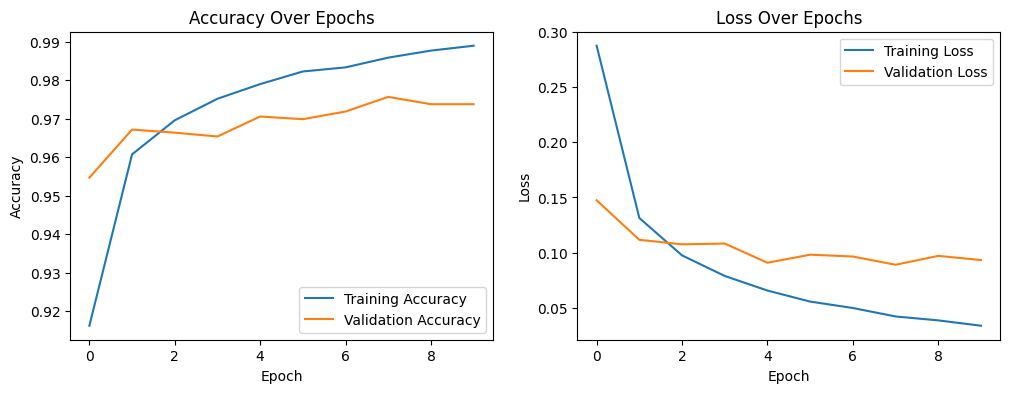

In [12]:
# ### Training and Validation Accuracy/Loss Plots

# %%
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.savefig("training_plots.png")  # Save for PPT
plt.show()

313/313 [==============================] - 1s 2ms/step


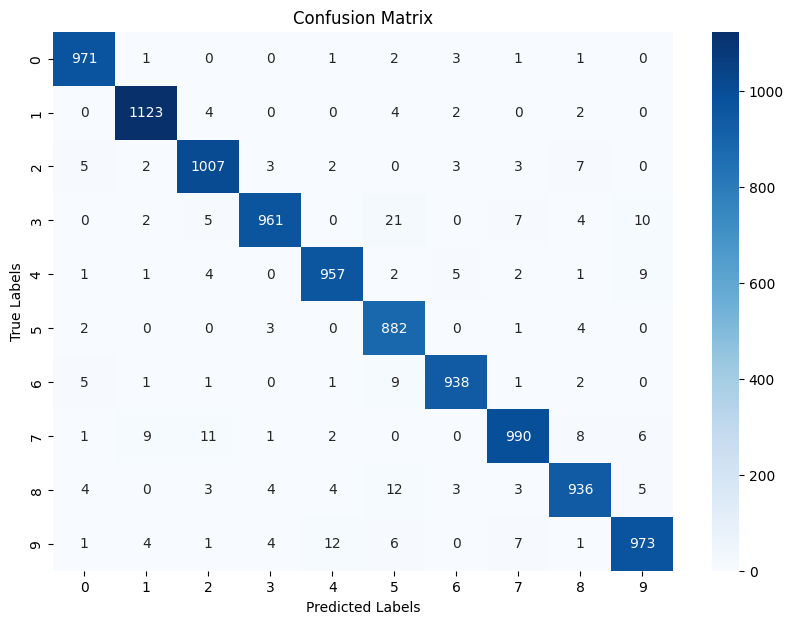

In [13]:
Y_pred = model.predict(X_test)
Y_pred_labels = [np.argmax(i) for i in Y_pred]
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")  # Save for PPT
plt.show()

1/1 [==============================] - 0s 41ms/step


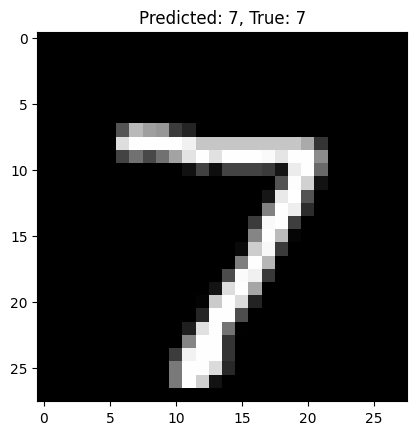

In [14]:
# ### Sample Test Prediction

# %%
plt.imshow(X_test[0], cmap="gray")
prediction = model.predict(X_test[0:1])
predicted_label = np.argmax(prediction)
plt.title(f"Predicted: {predicted_label}, True: {Y_test[0]}")
plt.savefig("test_prediction.png")  # Save for PPT
plt.show()

In [15]:
%pip install google.colab

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\emada\appdata\local\programs\python\python311\lib\site-packages\googletrans-3.0.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: Could not find a version that satisfies the requirement google.colab (from versions: none)
ERROR: No matching distribution found for google.colab


In [ ]:
# froma = model.save("mnist_model_updated.keras")
# # print("Model saved as 'mnist_model.keras'")
# from google.colab import files

# print("Upload a handwritten digit image (e.g., PNG/JPG):")
# uploaded = files.upload()

# # Process and predict
# input_image = cv2.imread(list(uploaded.keys())[0])
# grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
# input_image_resize = cv2.resize(grayscale, (28, 28))
# input_image_resize = input_image_resize / 255.0
# image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

# input_prediction = model.predict(image_reshaped)
# input_pred_label = np.argmax(input_prediction)

# plt.imshow(input_image_resize, cmap="gray")
# plt.title(f"Predicted Digit: {input_pred_label}")
# plt.savefig("custom_prediction.png")  # Save for PPT
# plt.show()
# print(f"The Handwritten Digit is recognized as: {input_pred_label}")

1/1 [==============================] - 0s 48ms/step


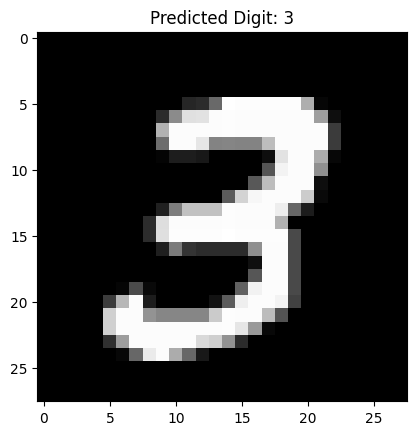

The Handwritten Digit is recognized as: 3


In [18]:
img_path="static/uploads/output.png"

input_image = cv2.imread(img_path)
if input_image is None:
    print("Error: Could not load image. Check the file path.")
else:
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    input_image_resize = cv2.resize(grayscale, (28, 28))
    input_image_resize = input_image_resize / 255.0
    image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    plt.imshow(input_image_resize, cmap='gray')
    plt.title(f"Predicted Digit: {input_pred_label}")
    plt.savefig('custom_prediction.png')  # Save for PPT
    plt.show()
    print(f"The Handwritten Digit is recognized as: {input_pred_label}")